In [1]:
# Dinamic Time Warping
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

# Tensorflow / Keras
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for assembling a Neural Network model
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, ReLU, LeakyReLU, Dropout # adding layers to the Neural Network model
from tensorflow.keras.utils import plot_model # for plotting model diagram
from tensorflow.keras.optimizers import Adam # for model optimization


# Data manipulation
import pandas as pd
print('pandas: %s' % pd.__version__) # print version

import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for scaling inputs used in the generator and discriminator


# Visualization
import cv2 # for ingesting images
print('OpenCV: %s' % cv2.__version__) # print version
import matplotlib
import matplotlib.pyplot as plt # or data visualizationa
print('matplotlib: %s' % matplotlib.__version__) # print version
import graphviz # for showing model diagram
print('graphviz: %s' % graphviz.__version__) # print version


# Other utilities
import sys
import os

# Assign main directory to a variable
# main_dir=os.path.dirname(sys.path[0])
main_dir = './content'
print(main_dir)



2024-08-20 17:19:28.069480: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-20 17:19:28.070091: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 17:19:28.073226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-20 17:19:28.081001: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 17:19:28.096935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Tensorflow/Keras: 3.5.0
pandas: 2.2.2
numpy: 1.26.4
sklearn: 1.5.1
OpenCV: 4.10.0
matplotlib: 3.9.2
graphviz: 0.20.1
./content


# Dinamyc Time Warping (DTW)

Dynamic time warping  is a way to compare two, usually temporal, sequences that do not perfectly sync up.

In [2]:
def dtw_media(data, label):
  # matriz de distancias
  matrix = dtw.distance_matrix_fast(data)

  # Convertir a DataFrame
  df_matrix =pd.DataFrame(matrix)

  print(f'***{label}***')

  # Calcular la media de cada serie con las demas
  mean_filas = df_matrix.mean(axis=1)
  mean_nuevo = mean_filas[50]
  print(f'La similitud media de la serie fake con las demás es: \n{mean_nuevo} \n')

  # Calcular la media de cada serie con las demas
  print(f'La media de cada serie temporal con las demas es: \n{mean_filas} \n')

  return mean_nuevo

# Deep Convolutional Generative Adversarial Network (DCGAN)

## Convert to images

In [3]:
def mean(data, no_elements):
    X = np.zeros((data.shape[0], data.shape[1]))  # Creamos una matriz de ceros con la misma forma que los datos de entrada.
    for i in range(data.shape[1] - no_elements + 1):  # En las últimas filas no se calcula la media, quedaran no_elements -1 filas de ceros al final
        X[:, i] = np.mean(data[:, i:i + no_elements], axis=1)  # asignamos a la columna i-ésima de X la media de la submatriz de los datos que va desde la columna i hasta la columna i + no_elements, a lo largo del eje 1 (columnas).
    return X.astype(np.float16)  # Finalmente, convertimos los valores en la matriz X a float16 para ahorrar memoria y la retornamos.

def median(data, no_elements):
    X = np.zeros((data.shape[0], data.shape[1]))
    for i in range(data.shape[1] - no_elements + 1):
        X[:, i] = np.median(data[:, i:i + no_elements], axis=1)
    return X.astype(np.float16)

def sig_image(data, size):
    X = np.zeros((data.shape[0], size, size))  # Creamos una matriz de ceros con la forma especificada: número de filas en los datos y tamaño dado al cuadrado.
    for i in range(data.shape[0]):  # Para cada índice desde 0 hasta el número de filas en los datos,
        X[i] = (data[i, :].reshape(size, size))  # asignamos a la i-ésima entrada de X los datos en la fila i, reorganizados como una matriz de tamaño size x size.
    return X.astype(np.float16)  # Finalmente, convertimos los valores en la matriz X a float16 para ahorrar memoria y la retornamos.

def convertir_a_imagenes(dataset):
    channel_mean = (mean(dataset, 10)).astype(np.float16)
    # Esto calculará la media en ventanas de tamaño 10 a lo largo de cada columna en 'x'.

    x_mean = sig_image(channel_mean, 40)
    # Esta función remodelará cada fila en 'channel_mean' en una imagen de 40x40.

    channel_median = (median(dataset, 10)).astype(np.float16)
    # Esto calculará la mediana en ventanas de tamaño 10 a lo largo de cada columna en 'x'.

    x_md = sig_image(dataset, 40)
    # Esta función remodelará cada fila en 'x' en una imagen de 40x40.

    x_n=sig_image(dataset,40)

    # np.stack() en Numpy se utiliza para unir un secuencia de arrays a lo largo de un nuevo eje.
    X=np.stack((x_n,x_mean,x_md),axis=1).astype(np.float16)

    # En Keras, los canales van al final
    X = X.transpose(0, 2, 3, 1)

    return X

## Load data

In [4]:
data_path = 'CWRU_datasets/CWRU_preprocess_data/unbalanced_dataset/unbalanced_npy_by_labels'

x_train = np.load(f'{data_path}/normaliced_data/x_train_norm_label1_20samples.npy')

data = convertir_a_imagenes(x_train)

# Show data shape
print("Shape of data_lowres: ", data.shape)

Shape of data_lowres:  (20, 40, 40, 3)


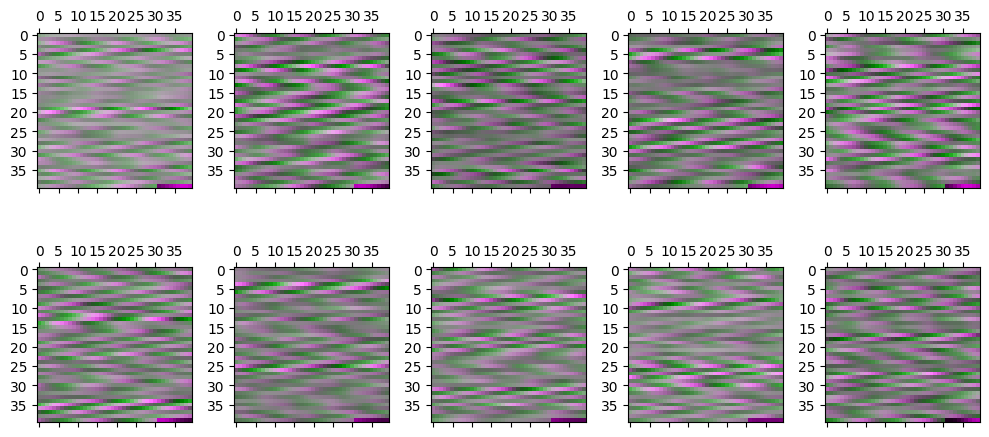

In [5]:
display10 = data.astype(np.float64)

# Display 10 real images
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(10,5), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(display10[n])
        n=n+1
plt.show()

# Setup GAN

### Generator model

/home/javi-zylk/Documents/TFM/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Generator-Hidden-Layer-1        │ (None, 3200)           │       323,200 │
│ (Dense)                         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-Reshape… │ (None, 5, 5, 128)      │             0 │
│ (Reshape)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-2        │ (None, 10, 10, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-Activat… │ (None, 10, 10, 128)    │             0 │
│ (ReLU)                          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-3        │ (None, 20, 20, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-Activat… │ (None, 20, 20, 256)    │             0 │
│ (ReLU)                          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-4        │ (None, 40, 40, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Hidden-Layer-Activat… │ (None, 40, 40, 512)    │             0 │
│ (ReLU)                          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Generator-Output-Layer (Conv2D) │ (None, 40, 40, 1)      │        12,801 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,220,481 (12.29 MB)

 Trainable params: 3,220,481 (12.29 MB)

 Non-trainable params: 0 (0.00 B)

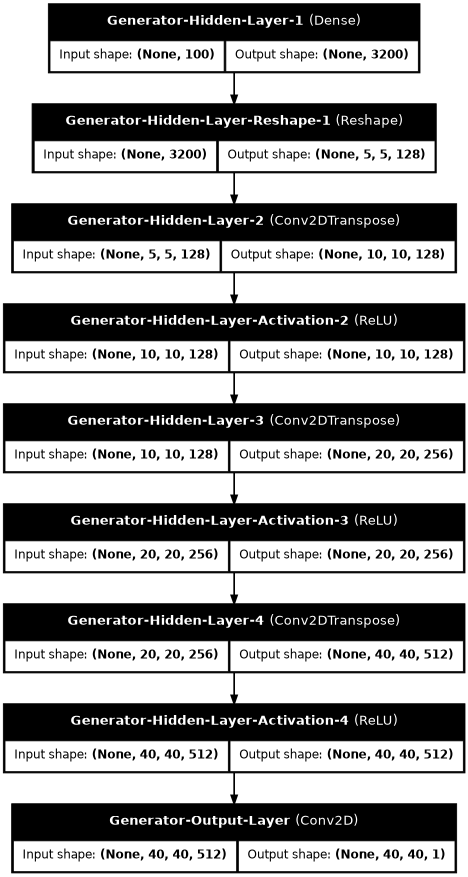

In [7]:
def generator(latent_dim):
    model = Sequential(name="Generator") # Model

    # Hidden Layer 1: Start with 5 x 5 image
    n_nodes = 5 * 5 * 128 # number of nodes in the first hidden layer
    model.add(Dense(n_nodes, input_dim=latent_dim, name='Generator-Hidden-Layer-1'))
    model.add(Reshape((5, 5, 128), name='Generator-Hidden-Layer-Reshape-1'))

    # Hidden Layer 2: Upsample to 10 x 10
    model.add(Conv2DTranspose(filters=128, kernel_size=(4,4), strides=(2,2), padding='same', name='Generator-Hidden-Layer-2'))
    model.add(ReLU(name='Generator-Hidden-Layer-Activation-2'))

    # Hidden Layer 3: Upsample to 20 x 20
    model.add(Conv2DTranspose(filters=256, kernel_size=(4,4), strides=(2,2), padding='same', name='Generator-Hidden-Layer-3'))
    model.add(ReLU(name='Generator-Hidden-Layer-Activation-3'))

    # Hidden Layer 4: Upsample to 40 x 40
    model.add(Conv2DTranspose(filters=512, kernel_size=(4,4), strides=(2,2), padding='same', name='Generator-Hidden-Layer-4'))
    model.add(ReLU(name='Generator-Hidden-Layer-Activation-4'))

    # Output Layer (Note, we use 3 filters because we have 3 channels for a color image. Grayscale would have only 1 channel)
    model.add(Conv2D(filters=1, kernel_size=(5,5), activation='tanh', padding='same', name='Generator-Output-Layer'))
    return model

# Instantiate
latent_dim=100 # Our latent space has 100 dimensions. We can change it to any number
gen_model = generator(latent_dim)

# Show model summary and plot model diagram
gen_model.summary()
plot_model(gen_model, show_shapes=True, show_layer_names=True, dpi=60) #, to_file='generator_structure.png')

### Discriminator model

/home/javi-zylk/Documents/TFM/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Discriminator-Hidden-Layer-1    │ (None, 20, 20, 64)     │         1,088 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Hidden-Layer-Act… │ (None, 20, 20, 64)     │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Hidden-Layer-2    │ (None, 10, 10, 128)    │       131,200 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Hidden-Layer-Act… │ (None, 10, 10, 128)    │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Hidden-Layer-3    │ (None, 5, 5, 128)      │       262,272 │
│ (Conv2D)                        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Hidden-Layer-Act… │ (None, 5, 5, 128)      │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Flatten-Layer     │ (None, 3200)           │             0 │
│ (Flatten)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Flatten-Layer-Dr… │ (None, 3200)           │             0 │
│ (Dropout)                       │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator-Output-Layer      │ (None, 1)              │         3,201 │
│ (Dense)                         │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,761 (1.52 MB)

 Trainable params: 397,761 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

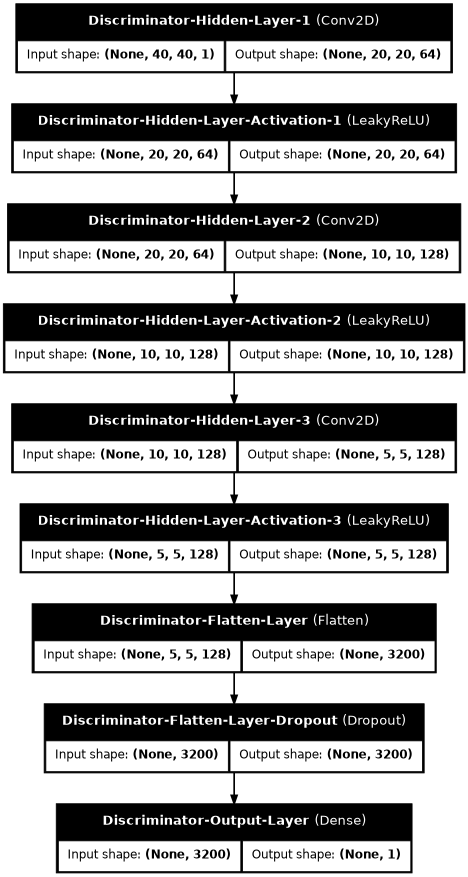

In [9]:
def discriminator(in_shape=(40,40,1)):
    model = Sequential(name="Discriminator") # Model

    # Hidden Layer 1
    model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(2, 2), padding='same', input_shape=in_shape, name='Discriminator-Hidden-Layer-1'))
    model.add(LeakyReLU(negative_slope=0.2, name='Discriminator-Hidden-Layer-Activation-1'))

    # Hidden Layer 2
    model.add(Conv2D(filters=128, kernel_size=(4,4), strides=(2, 2), padding='same', input_shape=in_shape, name='Discriminator-Hidden-Layer-2'))
    model.add(LeakyReLU(negative_slope=0.2, name='Discriminator-Hidden-Layer-Activation-2'))

    # Hidden Layer 3
    model.add(Conv2D(filters=128, kernel_size=(4,4), strides=(2, 2), padding='same', input_shape=in_shape, name='Discriminator-Hidden-Layer-3'))
    model.add(LeakyReLU(negative_slope=0.2, name='Discriminator-Hidden-Layer-Activation-3'))

    # Flatten and Output Layers
    model.add(Flatten(name='Discriminator-Flatten-Layer')) # Flatten the shape
    model.add(Dropout(0.3, name='Discriminator-Flatten-Layer-Dropout')) # Randomly drop some connections for better generalization
    model.add(Dense(1, activation='sigmoid', name='Discriminator-Output-Layer')) # Output Layer

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return model

# Instantiate
dis_model = discriminator()

# Show model summary and plot model diagram
dis_model.summary()
plot_model(dis_model, show_shapes=True, show_layer_names=True, dpi=60) #, to_file='discriminator_structure.png')

### Generator and Discriminator models into trainable GAN



Model: "DCGAN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Generator (Sequential)          │ (None, 40, 40, 1)      │     3,220,481 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Discriminator (Sequential)      │ (None, 1)              │       397,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,618,242 (13.80 MB)

 Trainable params: 3,220,481 (12.29 MB)

 Non-trainable params: 397,761 (1.52 MB)

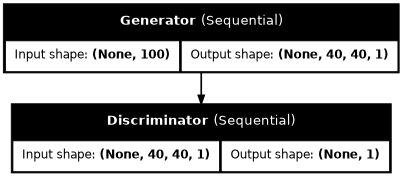

In [11]:
def def_gan(generator, discriminator):

    # We don't want to train the weights of discriminator at this stage. Hence, make it not trainable
    discriminator.trainable = False

    # Combine
    model = Sequential(name="DCGAN") # GAN Model
    model.add(generator) # Add Generator
    model.add(discriminator) # Add Disriminator

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Instantiate
gan_model = def_gan(gen_model, dis_model)

# Show model summary and plot model diagram
gan_model.summary()
plot_model(gan_model, show_shapes=True, show_layer_names=True, dpi=60) #, to_file='dcgan_structure.png')

### References

Dobilas, S. (2022, octubre 15). Deep Convolutional GAN — How to Use a DCGAN to Generate Images in Python.   
https://towardsdatascience.com/deep-convolutional-gan-how-to-use-a-dcgan-to-generate-images-in-python-b08afd4d124e